In [ ]:
# Data Collection, Data Cleaning & Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Transformation
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats

# Model Building
import itertools
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, RNN, Input, Bidirectional
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.metrics import accuracy_score, mean_squared_error as mse
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
import pandas as pd

df = pd.read_csv('/content/student_topic_analysis_results.csv')
df= df[['mean hesitation', 'mean conf', 'grammar point', 'unique word (%)', '% rare words', 'words', 'IELTS speaking score']]
df=df.dropna(axis=0, how='any')
df['grammar point']=df['grammar point'].astype(float)
df = df.rename(columns={'IELTS speaking score': 'score'})
df = df.rename(columns={'% rare words': '% rare word'})
df = df.rename(columns={'unique word (%)': '% unique word'})
df = df.rename(columns={'words': 'number of word'})

In [ ]:
feat_cols = ['mean hesitation', 'mean conf', 'grammar point', '% unique word', '% rare word', 'number of word']
# khai báo hàm chuẩn hóa Min-Max
def min_max_norm(x):
    return (x - x.min()) / (x.max() - x.min())

# chuẩn hóa cột 'col1' và 'col2' bằng Min-Max normalization
df[feat_cols] = df[feat_cols].apply(min_max_norm)
# Find the most popular songs on Sportify
top20_songs= df.query('score > 65.0', inplace = False).sort_values('score', ascending = False)#.head(100)
mean_vals = pd.DataFrame(columns=feat_cols)
mean_vals = mean_vals.append(top20_songs[feat_cols].mean(), ignore_index=True)
mean_vals = mean_vals.append(df[feat_cols].mean(), ignore_index=True)

print(mean_vals)
plt.figure(figsize=(8,6))
import plotly.graph_objects as go
import plotly.offline as pyo
fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_vals.iloc[0], theta=feat_cols, fill='toself', name='IELTS speaking score>6.5'),
        go.Scatterpolar(r=mean_vals.iloc[1], theta=feat_cols, fill='toself', name='All'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Features comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

#pyo.plot(fig)
fig.show()

   mean hesitation  mean conf  grammar point  % unique word  % rare word  \
0         0.189495   0.863882       0.896332       0.351504     0.622655   
1         0.089150   0.893003       0.806443       0.446187     0.541936   

   number of word  
0        0.337916  
1        0.204301  


<Figure size 800x600 with 0 Axes>

In [ ]:
df

,mean hesitation,mean conf,grammar point,% unique word,% rare word,number of word,score
0,0.184235,0.924379,53.0,71.0,13.0,109.0,50.0
1,0.186960,0.312786,85.0,73.0,14.0,48.0,50.0
5,0.186960,0.920568,85.0,73.0,14.0,48.0,50.0
6,0.119259,0.948491,54.0,55.0,24.0,155.0,50.0
7,0.108429,0.956278,60.0,60.0,24.0,99.0,50.0
...,...,...,...,...,...,...,...
1210,0.142134,0.948519,100.0,53.0,26.0,492.0,65.0
1216,0.270000,1.000000,92.0,60.0,10.0,103.0,60.0
1217,2.744711,0.807130,75.0,79.0,18.0,57.0,60.0
1218,0.358351,1.000000,75.0,75.0,23.0,40.0,60.0


array([[<Axes: title={'center': 'mean hesitation'}>,
        <Axes: title={'center': 'mean conf'}>,
        <Axes: title={'center': 'grammar point'}>],
       [<Axes: title={'center': '% unique word'}>,
        <Axes: title={'center': '% rare word'}>,
        <Axes: title={'center': 'number of word'}>],
       [<Axes: title={'center': 'score'}>, <Axes: >, <Axes: >]],
      dtype=object)

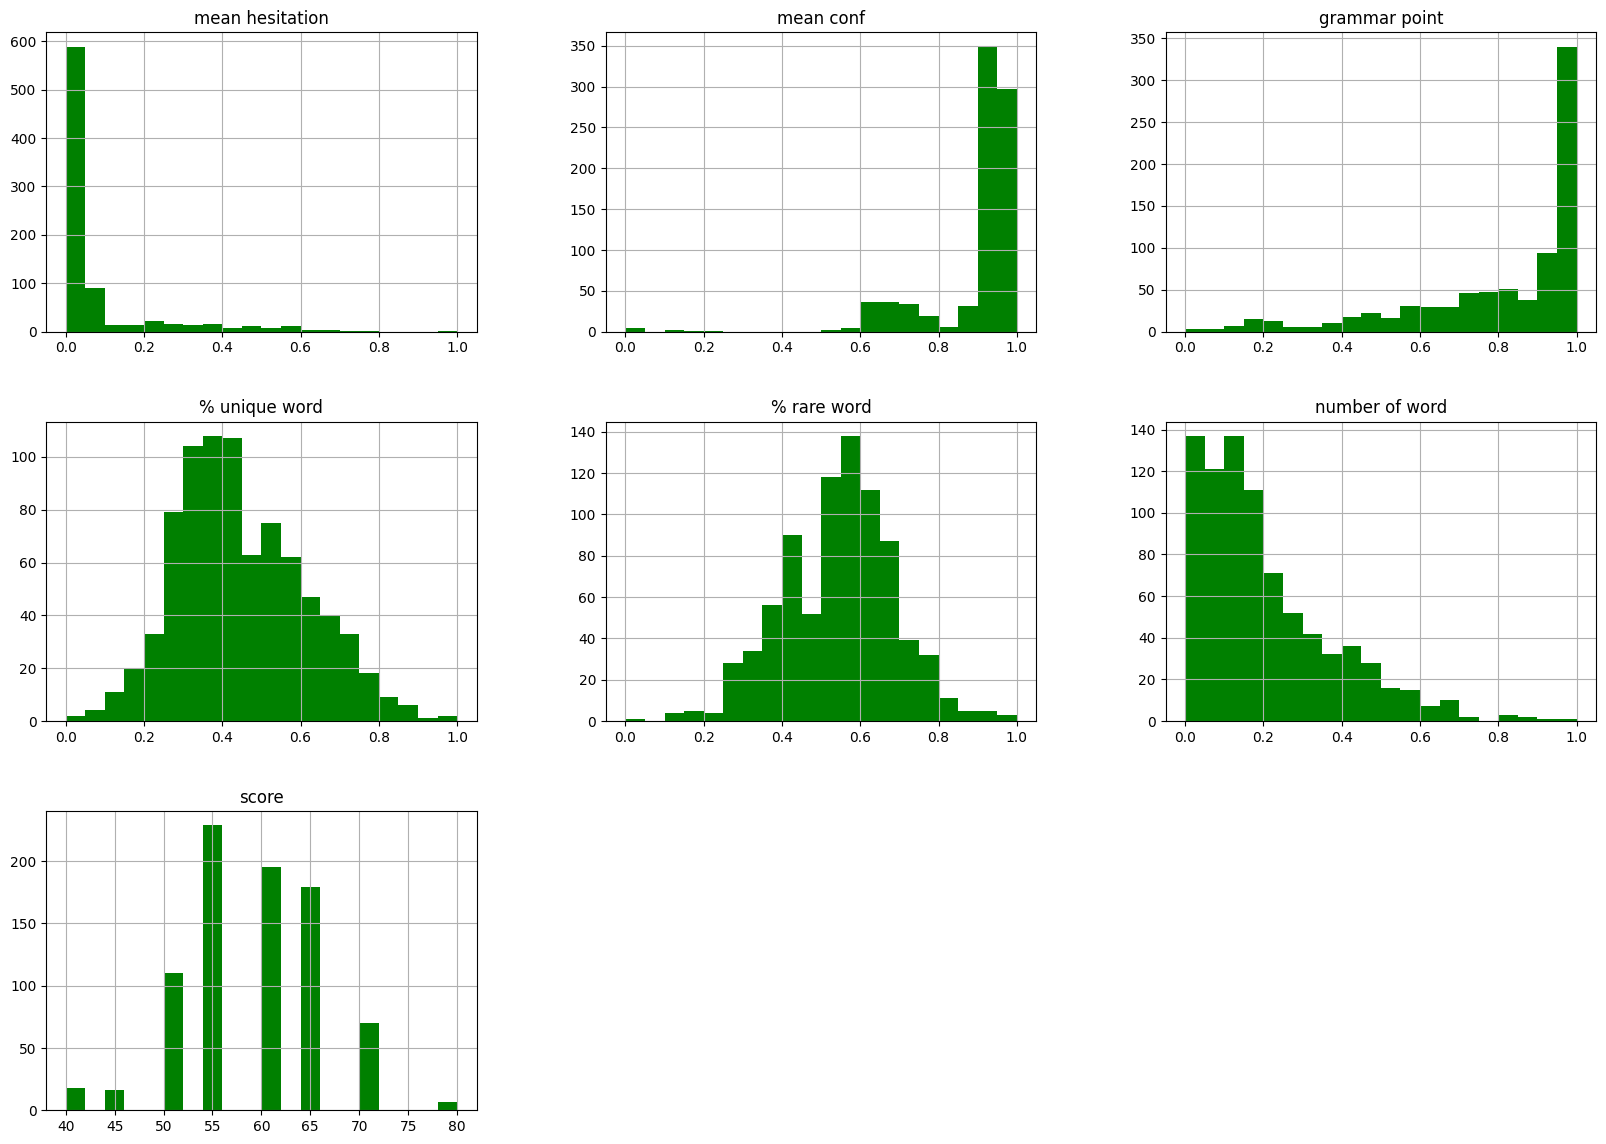

In [ ]:
df.hist(bins=20, color='green', figsize=(20,14))

In [ ]:
df.describe()

,mean hesitation,mean conf,grammar point,unique word (%),% rare words,words,IELTS speaking score,combine words w grammar point
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,0.349034,0.906669,0.809303,57.514687,19.637292,0.208308,59.169860,0.675077
std,0.505601,0.110551,0.231639,12.453575,5.111918,0.170041,5.947383,0.101450
min,0.043750,0.094283,0.000000,24.000000,0.000000,0.000000,50.000000,0.501699
25%,0.114128,0.922633,0.692982,49.000000,16.000000,0.082838,55.000000,0.601857
50%,0.161487,0.948122,0.929825,56.000000,20.000000,0.158879,60.000000,0.648374
75%,0.230761,0.962651,0.982456,65.000000,23.000000,0.292693,65.000000,0.726211
max,3.600686,1.000000,1.000000,100.000000,36.000000,1.000000,70.000000,1.099654


<Axes: >

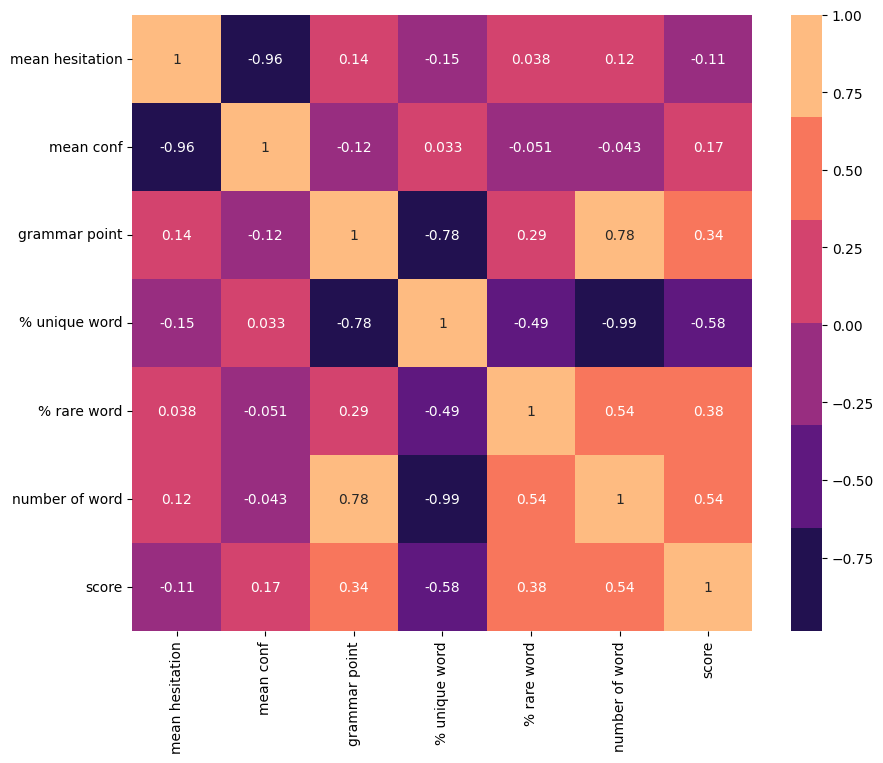

In [ ]:
plt.figure(figsize=(10,8))
corr_matrix = df.corr().corr(method='pearson')
cmap = sns.color_palette('magma')
sns.heatmap(corr_matrix, annot=True, cmap=cmap)


<Axes: >

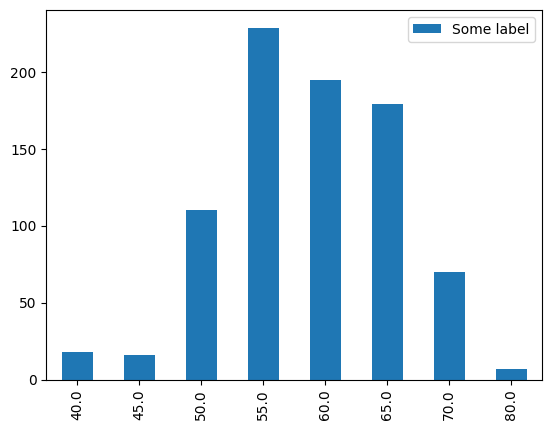

In [ ]:
df1 = pd.DataFrame.from_dict(elements_count, orient ='index', columns=['Some label'])
df1.sort_index(inplace=True)
df1.plot.bar()

In [ ]:
high_corr = abs(corr_matrix)['IELTS speaking score'].sort_values(ascending=False).to_frame().reset_index()
high_corr.columns = ['features', 'Corr']
highcorr_features = high_corr['features']
for f in highcorr_features:
  print(f, ':', stats.pearsonr(df[f], df['IELTS speaking score']))

IELTS speaking score : PearsonRResult(statistic=0.9999999999999996, pvalue=0.0)
unique word (%) : PearsonRResult(statistic=-0.2992509945702137, pvalue=1.6487842320667577e-18)
words : PearsonRResult(statistic=0.29825805670425637, pvalue=2.1619603049048083e-18)
% rare words : PearsonRResult(statistic=0.2564754993089833, pvalue=7.634908990136088e-14)
grammar point : PearsonRResult(statistic=0.1871869742282859, pvalue=6.196515113224349e-08)
mean conf : PearsonRResult(statistic=0.13639069074193846, pvalue=8.580719314006717e-05)
mean hesitation : PearsonRResult(statistic=-0.017570145994761744, pvalue=0.6145204878063555)


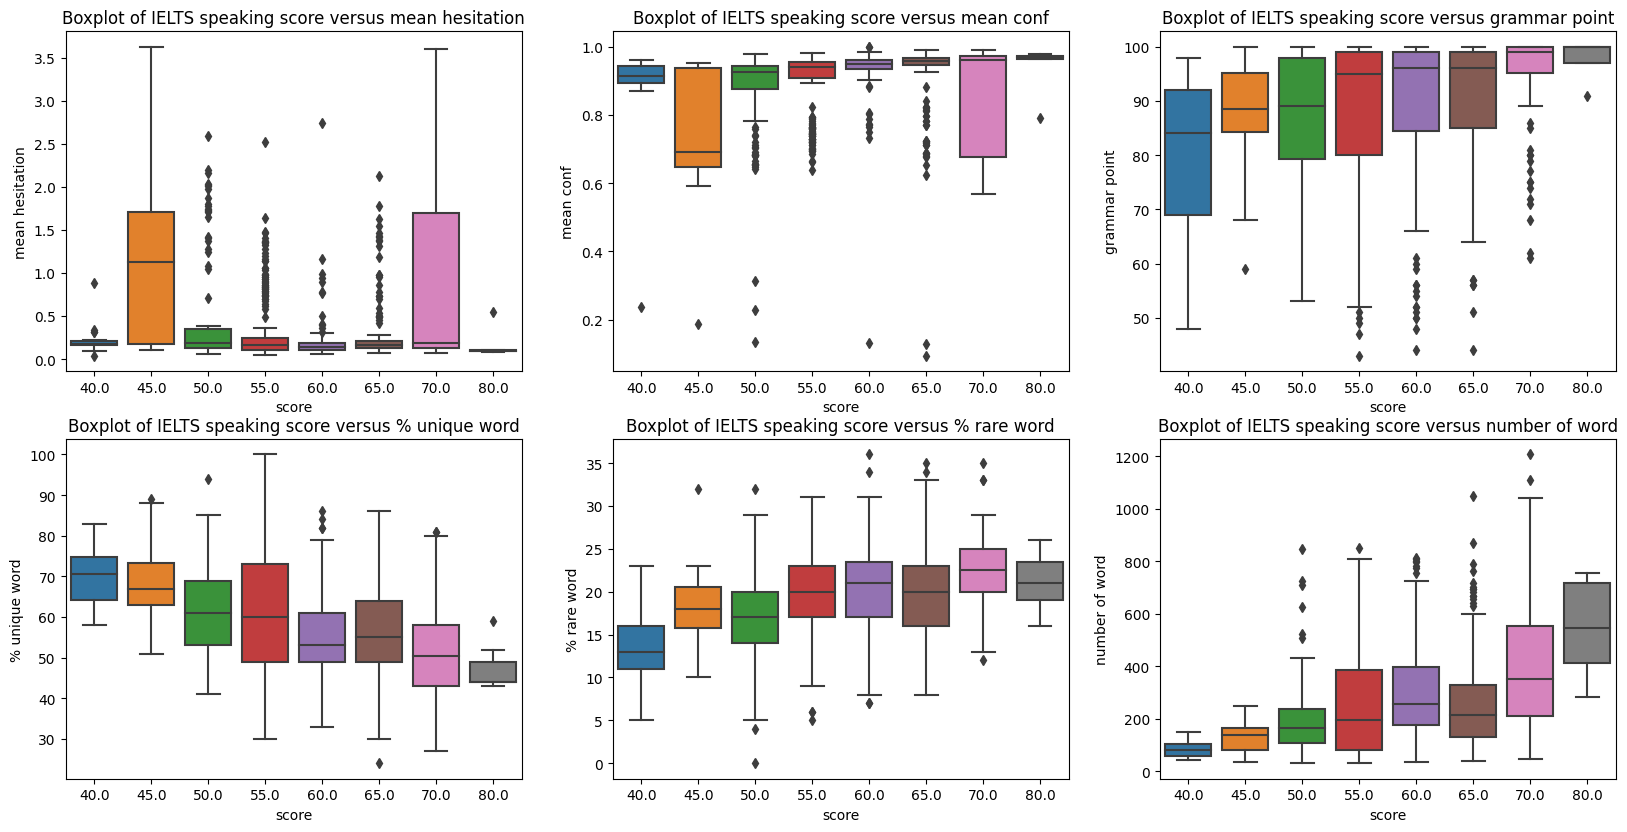

In [ ]:
list_f = ['mean hesitation', 'mean conf', 'grammar point', '% unique word', '% rare word', 'number of word']
i = 1
i = 1
plt.figure(figsize=(20,15))
for l in list_f:
  plt.subplot(3,3,i)
  sns.boxplot(data=df, y=l, x='score')
  plt.title('Boxplot of IELTS speaking score versus '+  l)
  i+=1

phân tích ANOVA

In [ ]:
#Đối với biến mean conf
grouped_mode = df.groupby(['IELTS speaking score'])
anova_mode = stats.f_oneway(grouped_mode.get_group(40.0)['mean conf'],
                            grouped_mode.get_group(45.0)['mean conf'],
                            grouped_mode.get_group(50.0)['mean conf'],
                            grouped_mode.get_group(55.0)['mean conf'],
                            grouped_mode.get_group(60.0)['mean conf'],
                            grouped_mode.get_group(65.0)['mean conf'],
                            grouped_mode.get_group(70.0)['mean conf'],
                            grouped_mode.get_group(80.0)['mean conf']
                            )
anova_mode

F_onewayResult(statistic=11.4987871025083, pvalue=5.6303266043606334e-14)

In [ ]:
#Đối với biến mean hesitation
grouped_mode = df.groupby(['IELTS speaking score'])
anova_mode = stats.f_oneway(grouped_mode.get_group(40.0)['mean hesitation'],
                            grouped_mode.get_group(45.0)['mean hesitation'],
                            grouped_mode.get_group(50.0)['mean hesitation'],
                            grouped_mode.get_group(55.0)['mean hesitation'],
                            grouped_mode.get_group(60.0)['mean hesitation'],
                            grouped_mode.get_group(65.0)['mean hesitation'],
                            grouped_mode.get_group(70.0)['mean hesitation'],
                            grouped_mode.get_group(80.0)['mean hesitation']
                            )
anova_mode

F_onewayResult(statistic=17.856588551982156, pvalue=3.811839151251835e-22)

In [ ]:
#Đối với biến grammar point
grouped_mode = df.groupby(['IELTS speaking score'])
anova_mode = stats.f_oneway(grouped_mode.get_group(40.0)['grammar point'],
                            grouped_mode.get_group(45.0)['grammar point'],
                            grouped_mode.get_group(50.0)['grammar point'],
                            grouped_mode.get_group(55.0)['grammar point'],
                            grouped_mode.get_group(60.0)['grammar point'],
                            grouped_mode.get_group(65.0)['grammar point'],
                            grouped_mode.get_group(70.0)['grammar point'],
                            grouped_mode.get_group(80.0)['grammar point']
                            )
anova_mode

F_onewayResult(statistic=4.548237836718642, pvalue=5.4093412252597286e-05)

In [ ]:
#Đối với biến unique word (%)
grouped_mode = df.groupby(['IELTS speaking score'])
anova_mode = stats.f_oneway(grouped_mode.get_group(40.0)['unique word (%)'],
                            grouped_mode.get_group(45.0)['unique word (%)'],
                            grouped_mode.get_group(50.0)['unique word (%)'],
                            grouped_mode.get_group(55.0)['unique word (%)'],
                            grouped_mode.get_group(60.0)['unique word (%)'],
                            grouped_mode.get_group(65.0)['unique word (%)'],
                            grouped_mode.get_group(70.0)['unique word (%)'],
                            grouped_mode.get_group(80.0)['unique word (%)']
                            )
anova_mode

F_onewayResult(statistic=13.601638448685438, pvalue=1.0597779284532375e-16)

In [ ]:
#Đối với biến % rare words
grouped_mode = df.groupby(['IELTS speaking score'])
anova_mode = stats.f_oneway(grouped_mode.get_group(40.0)['% rare words'],
                            grouped_mode.get_group(45.0)['% rare words'],
                            grouped_mode.get_group(50.0)['% rare words'],
                            grouped_mode.get_group(55.0)['% rare words'],
                            grouped_mode.get_group(60.0)['% rare words'],
                            grouped_mode.get_group(65.0)['% rare words'],
                            grouped_mode.get_group(70.0)['% rare words'],
                            grouped_mode.get_group(80.0)['% rare words']
                            )
anova_mode

F_onewayResult(statistic=11.564789204895764, pvalue=4.62103444057774e-14)

In [ ]:
#Đối với biến words
grouped_mode = df.groupby(['IELTS speaking score'])
anova_mode = stats.f_oneway(grouped_mode.get_group(40.0)['words'],
                            grouped_mode.get_group(45.0)['words'],
                            grouped_mode.get_group(50.0)['words'],
                            grouped_mode.get_group(55.0)['words'],
                            grouped_mode.get_group(60.0)['words'],
                            grouped_mode.get_group(65.0)['words'],
                            grouped_mode.get_group(70.0)['words'],
                            grouped_mode.get_group(80.0)['words']
                            )
anova_mode

F_onewayResult(statistic=15.198246841185334, pvalue=9.332190916813856e-19)

In [ ]:
# split train/val/test
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state = 42)

In [ ]:
X_test = testset[['mean hesitation', 'mean conf', 'grammar point', '% unique word', '% rare word', 'number of word']]
y_test = testset[['score']]

X_train = trainset[['mean hesitation', 'mean conf', 'grammar point', '% unique word', '% rare word', 'number of word']]
y_train = trainset[['score']]

## Using Traditional Undersampling/Oversampling technique

Sử dụng SMOTE (Synthetic Minority Oversampling Technique) để cân bằng dữ liệu không cân bằng. Nó tăng ngẫu nhiên các mẫu thiểu số bằng cách sao chép chúng dựa trên k- hàng xóm gần nhất (k_nearest neighbors) cho mỗi ví dụ của lớp thiểu số.

Trong trường hợp này, chúng em sẽ chọn giá trị k-nearest neighbors bằng 5. Tuy nhiên, có nhiều giá trị y không có đến 5 samples để SMOTE có thể dựa vào và tạo ra dữ liệu training ảo bằng phương pháp nội suy tuyến tính (virtual training records by linear interpolation). Vì vậy đối với những giá trị y thuộc lớp thiểu số này, chúng em sẽ chỉ sử dụng random oversampling vì phương pháp này không phải chịu ràng buộc gì với số lượng samples mà lớp đó có.

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [ ]:
# Chia train dataset dựa trên biến mục tiêu thiểu số
minority = trainset[trainset['score'].isin([40.0, 70.0, 80.0, 45.0])]
X_tr_minority = minority[['mean hesitation', 'mean conf', 'grammar point', '% unique word', '% rare word', 'number of word']]
y_tr_minority = minority[['score']]

# Chia train dataset dựa trên biến mục tiêu đa số

majority = trainset[trainset['score'].isin([50.0, 55.0, 60.0, 65.0, 65.0])]
X_tr_majority = majority[['mean hesitation', 'mean conf', 'grammar point', '% unique word', '% rare word', 'number of word']]
y_tr_majority = majority[['score']]

In [ ]:
print('Before OverSampling, the shape of X_tr_minority: {}'.format(X_tr_minority.shape))
print('Before OverSampling, the shape of y_tr_minority: {} \n'.format(y_tr_minority.shape))
random = RandomOverSampler(random_state = 5)
X_tr_random, y_tr_random = random.fit_resample(X_tr_minority, y_tr_minority)
print('After OverSampling, the shape of X_tr_random: {}'.format(X_tr_random.shape))
print('After OverSampling, the shape of y_tr_random: {} \n'.format(y_tr_random.shape))

Before OverSampling, the shape of X_tr_minority: (88, 6)
Before OverSampling, the shape of y_tr_minority: (88, 1) 

After OverSampling, the shape of X_tr_random: (216, 6)
After OverSampling, the shape of y_tr_random: (216, 1) 



* Sử dụng SMOTE cho với trainset chứa biến mục tiêu có giá trị thuộc đa số

In [ ]:
print('Before OverSampling, the shape of X_tr_majority: {}'.format(X_tr_majority.shape))
print('Before OverSampling, the shape of y_tr_majority: {} \n'.format(y_tr_majority.shape))
smote = SMOTE(random_state= 5)
X_tr_smote, y_tr_smote = smote.fit_resample(X_tr_majority, y_tr_majority)
print('After OverSampling, the shape of X_tr_smote: {}'.format(X_tr_smote.shape))
print('After OverSampling, the shape of y_tr_smote: {} \n'.format(y_tr_smote.shape))

Before OverSampling, the shape of X_tr_majority: (571, 6)
Before OverSampling, the shape of y_tr_majority: (571, 1) 

After OverSampling, the shape of X_tr_smote: (748, 6)
After OverSampling, the shape of y_tr_smote: (748, 1) 



In [ ]:
X_tr_resample = pd.concat([X_tr_smote, X_tr_random])
y_tr_resample = pd.concat([y_tr_smote, y_tr_random])

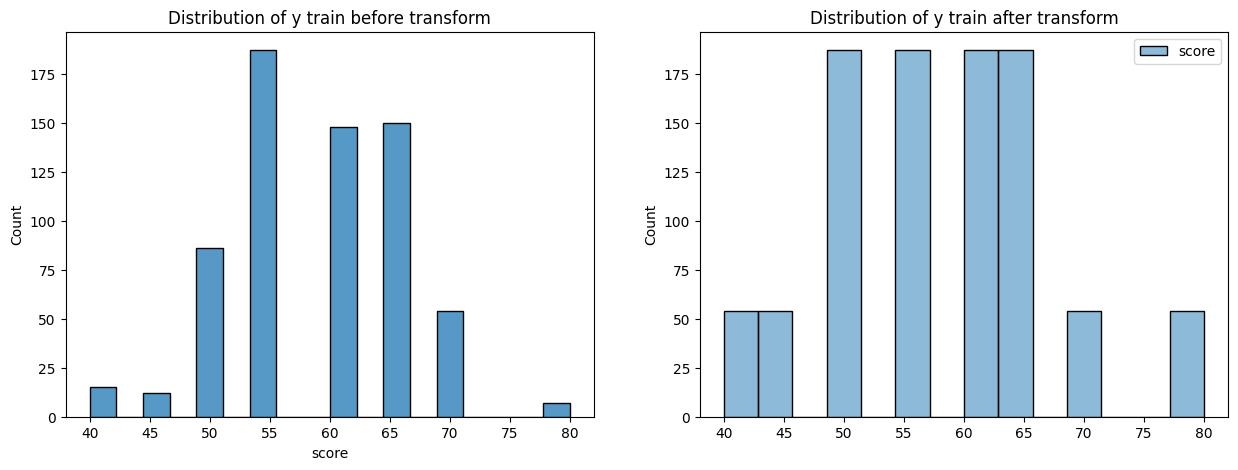

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(trainset, x='score')
plt.title('Distribution of y train before transform')
plt.subplot(1,2,2)
sns.histplot(y_tr_resample, color="purple")
plt.title('Distribution of y train after transform')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)

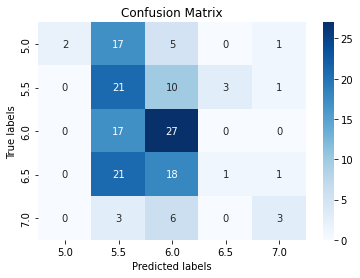

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cf, annot=True, cmap='Blues', fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['5.0', '5.5', '6.0', '6.5', '7.0']); ax.yaxis.set_ticklabels(['5.0', '5.5', '6.0', '6.5', '7.0']);

In [ ]:
#SMOTE + Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rfcl = RandomForestClassifier(max_depth=9, random_state=0)
rfcl.fit(X_tr_resample, y_tr_resample)
y_pred_SMOTE_rf = rfcl.predict(X_test)
print(classification_report(y_test, y_pred_SMOTE_rf))

<ipython-input-11-ba84edc7dcb7>:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



              precision    recall  f1-score   support

        40.0       0.20      0.33      0.25         3
        45.0       0.00      0.00      0.00         4
        50.0       0.30      0.46      0.36        24
        55.0       0.58      0.43      0.49        42
        60.0       0.50      0.47      0.48        47
        65.0       0.33      0.38      0.35        29
        70.0       0.64      0.56      0.60        16

    accuracy                           0.44       165
   macro avg       0.36      0.38      0.36       165
weighted avg       0.46      0.44      0.44       165



In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def short_metrics(preds, labels, train_labels, many_shot_thr=100, low_shot_thr=75):
  train_class_count, test_class_count = [], []
  mse_per_class, l1_per_class, r2_per_class = [], [], []
  for l in np.unique(np.floor(labels)):
    train_class_count.append(len(train_labels[np.floor(train_labels)==l]))
    test_class_count.append(len(labels[np.floor(labels)==l]))
    mse_per_class.append(np.sum((preds[np.floor(labels)==l]-labels[np.floor(labels)==l])**2))
    l1_per_class.append(np.sum(np.abs(preds[np.floor(labels)==l]-labels[np.floor(labels)==l])))
    r2_per_class.append(r2_score(labels[np.floor(labels)==l],preds[np.floor(labels)==l]))

  many_shot_mse, median_shot_mse, low_shot_mse = [], [], []
  many_shot_l1, median_shot_l1, low_shot_l1 = [], [], []
  many_shot_r2, median_shot_r2, low_shot_r2 = [], [], []
  many_shot_cnt, median_shot_cnt, low_shot_cnt = [], [], []
  for i in range(len(train_class_count)):
      if train_class_count[i] > many_shot_thr:
          many_shot_mse.append(mse_per_class[i])
          many_shot_l1.append(l1_per_class[i])
          many_shot_r2.append(r2_per_class[i])
          many_shot_cnt.append(test_class_count[i])
      elif train_class_count[i] < low_shot_thr:
          low_shot_mse.append(mse_per_class[i])
          low_shot_l1.append(l1_per_class[i])
          low_shot_r2.append(r2_per_class[i])
          low_shot_cnt.append(test_class_count[i])
      else:
          median_shot_mse.append(mse_per_class[i])
          median_shot_l1.append(l1_per_class[i])
          median_shot_r2.append(r2_per_class[i])
          median_shot_cnt.append(test_class_count[i])

  shot_dict = {}
  shot_dict['many mse'] = np.sum(many_shot_mse) / np.sum(many_shot_cnt)
  shot_dict['many l1'] = np.sum(many_shot_l1) / np.sum(many_shot_cnt)
  shot_dict['many r2'] = np.sum(many_shot_r2) / np.sum(many_shot_cnt)
  shot_dict['median mse'] = np.sum(median_shot_mse) / np.sum(median_shot_cnt)
  shot_dict['median l1'] = np.sum(median_shot_l1) / np.sum(median_shot_cnt)
  shot_dict['median r2'] = np.sum(median_shot_r2) / np.sum(median_shot_cnt)
  shot_dict['low mse'] = np.sum(low_shot_mse) / np.sum(low_shot_cnt)
  shot_dict['low l1'] = np.sum(low_shot_l1) / np.sum(low_shot_cnt)
  shot_dict['low r2'] = np.sum(low_shot_r2) / np.sum(low_shot_cnt)

  mse = mean_squared_error(preds, labels)
  mae = mean_absolute_error(preds, labels)
  r2 = r2_score(labels, preds)
  print(f" * Overall: MSE {mse:.3f}\tL1 {mae:.3f}\tR2 {r2:.3f}")
  print(f" * Many: MSE {shot_dict['many mse']:.3f}\t"
              f"L1 {shot_dict['many l1']:.3f}\tR2 score {shot_dict['many r2']:.3f}")
  print(f" * Median: MSE {shot_dict['median mse']:.3f}\t"
              f"L1 {shot_dict['median l1']:.3f}\tR2 score {shot_dict['median r2']:.3f}")
  print(f" * Low: MSE {shot_dict['low mse']:.3f}\t"
              f"L1 {shot_dict['low l1']:.3f}\tR2 score {shot_dict['low r2']:.3f}")

  return None

In [ ]:
short_metrics(np.squeeze(y_pred_none_rf), np.squeeze(y_test.to_numpy()), np.squeeze(y_tr_resample.to_numpy()))

 * Overall: MSE 46.667	L1 4.424	R2 -0.034
 * Many: MSE 35.387	L1 3.979	R2 score 0.000
 * Median: MSE nan	L1 nan	R2 score nan
 * Low: MSE 116.304	L1 7.174	R2 score 0.000


<ipython-input-15-49b9af49d43d>:37: RuntimeWarning:

invalid value encountered in double_scalars

<ipython-input-15-49b9af49d43d>:38: RuntimeWarning:

invalid value encountered in double_scalars

<ipython-input-15-49b9af49d43d>:39: RuntimeWarning:

invalid value encountered in double_scalars



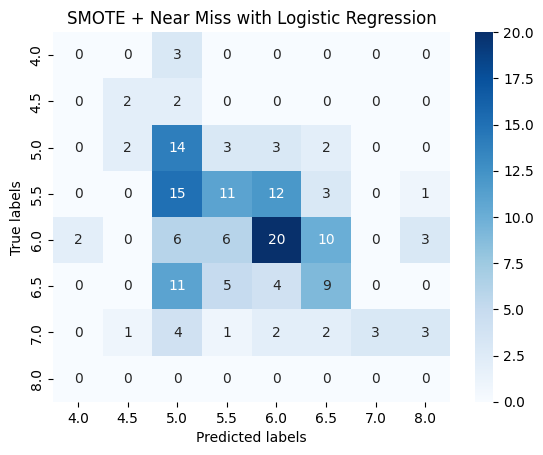

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred_2_lgr)
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cf, annot=True, cmap='Blues', fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('SMOTE + Near Miss with Logistic Regression');
ax.xaxis.set_ticklabels(['4.0', '4.5','5.0', '5.5', '6.0', '6.5', '7.0', '8.0']); ax.yaxis.set_ticklabels(['4.0', '4.5','5.0', '5.5', '6.0', '6.5', '7.0', '8.0']);

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression().fit(X_tr_resample1, y_tr_resample1)
y_pred_2_lgr=logistic.predict(X_test)
print(classification_report(y_test, y_pred_2_lgr))

              precision    recall  f1-score   support

        40.0       0.00      0.00      0.00         3
        45.0       0.40      0.50      0.44         4
        50.0       0.25      0.58      0.35        24
        55.0       0.42      0.26      0.32        42
        60.0       0.49      0.43      0.45        47
        65.0       0.35      0.31      0.33        29
        70.0       1.00      0.19      0.32        16
        80.0       0.00      0.00      0.00         0

    accuracy                           0.36       165
   macro avg       0.36      0.28      0.28       165
weighted avg       0.45      0.36      0.36       165



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/s

In [ ]:
#None + Random Forest
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(max_depth=9, random_state=0)
rfcl.fit(X_tr_resample1, y_tr_resample1)
y_pred_2_rf = rfcl.predict(X_test)
print(classification_report(y_test, y_pred_2_rf))

<ipython-input-45-f2f5103ba4a3>:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



              precision    recall  f1-score   support

        40.0       0.12      0.33      0.18         3
        45.0       0.00      0.00      0.00         4
        50.0       0.27      0.33      0.30        24
        55.0       0.57      0.38      0.46        42
        60.0       0.48      0.47      0.47        47
        65.0       0.29      0.34      0.31        29
        70.0       0.64      0.56      0.60        16
        80.0       0.00      0.00      0.00         0

    accuracy                           0.40       165
   macro avg       0.30      0.30      0.29       165
weighted avg       0.44      0.40      0.41       165



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [ ]:
short_metrics(np.squeeze(y_pred_2_lgr), np.squeeze(y_test.to_numpy()), np.squeeze(y_tr_resample.to_numpy()))

 * Overall: MSE 72.121	L1 5.879	R2 -0.597
 * Many: MSE 60.211	L1 5.282	R2 score 0.000
 * Median: MSE nan	L1 nan	R2 score nan
 * Low: MSE 145.652	L1 9.565	R2 score 0.000


<ipython-input-15-49b9af49d43d>:37: RuntimeWarning:

invalid value encountered in double_scalars

<ipython-input-15-49b9af49d43d>:38: RuntimeWarning:

invalid value encountered in double_scalars

<ipython-input-15-49b9af49d43d>:39: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cf, annot=True, cmap='Blues', fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['5.0', '5.5', '6.0', '6.5', '7.0']); ax.yaxis.set_ticklabels(['5.0','5.5', '6.0', '6.5', '7.0']);

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_tr_resample1, y_tr_resample1)
y_pred_2_svm = svm.predict(X_test)
print(classification_report(y_test, y_pred_2_svm))

              precision    recall  f1-score   support

        40.0       0.00      0.00      0.00         3
        45.0       0.50      0.25      0.33         4
        50.0       0.25      0.54      0.34        24
        55.0       0.54      0.36      0.43        42
        60.0       0.47      0.45      0.46        47
        65.0       0.43      0.21      0.28        29
        70.0       1.00      0.31      0.48        16
        80.0       0.00      0.00      0.00         0

    accuracy                           0.37       165
   macro avg       0.40      0.26      0.29       165
weighted avg       0.49      0.37      0.39       165



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# Chia train dataset để áp dụng Near Miss
majority1 = trainset[trainset['score'].isin([55.0, 60.0])]
X_tr_miss = majority1[['mean hesitation', 'mean conf', 'grammar point', '% unique word', '% rare word', 'number of word']]
y_tr_miss = majority1[['score']]

# Chia train dataset để áp dụng Oversampling
#minority1 = trainset[trainset['score'].isin([50.0, 40.0, 70.0, 65.0, 80.0, 45.0 ])]

## Áp dụng SMOTE
smoteset = trainset[trainset['score'].isin([40.0, 70.0, 80.0, 45.0])]
X_tr_smote = smoteset[['mean hesitation', 'mean conf', 'grammar point', '% unique word', '% rare word', 'number of word']]
y_tr_smote = smoteset[['score']]
## Áp dụng Random Oversampling
randomset = trainset[trainset['score'].isin([50.0, 65.0])]
X_tr_random = randomset[['mean hesitation', 'mean conf', 'grammar point', '% unique word', '% rare word', 'number of word']]
y_tr_random = randomset[['score']]

In [ ]:
print('Before using Near Miss-UnderSampling, the shape of X_tr_miss: {}'.format(X_tr_miss.shape))
print('Before using Near Miss-UnderSampling, the shape of y_tr_miss: {} \n'.format(y_tr_miss.shape))
miss = NearMiss()
X_tr_miss, y_tr_miss = miss.fit_resample(X_tr_miss, y_tr_miss)
print('After using Near Miss-UnderSampling, the shape of X_tr_miss: {}'.format(X_tr_miss.shape))
print('After using Near Miss-UnderSampling, the shape of y_tr_miss: {} \n'.format(y_tr_miss.shape))

print('Before using SMOTE-Oversampling, the shape of X_tr_smote: {}'.format(X_tr_smote.shape))
print('Before using SMOTE-Oversampling, the shape of y_tr_smote: {} \n'.format(y_tr_smote.shape))
smote = SMOTE(random_state=2)
X_tr_smote, y_tr_smote = smote.fit_resample(X_tr_smote, y_tr_smote)
print('After using SMOTE-Oversampling, the shape of X_tr_smote: {}'.format(X_tr_smote.shape))
print('After using SMOTE-Oversampling, the shape of y_tr_smote: {} \n'.format(y_tr_smote.shape))

Before using Near Miss-UnderSampling, the shape of X_tr_miss: (335, 6)
Before using Near Miss-UnderSampling, the shape of y_tr_miss: (335, 1) 

After using Near Miss-UnderSampling, the shape of X_tr_miss: (296, 6)
After using Near Miss-UnderSampling, the shape of y_tr_miss: (296, 1) 

Before using SMOTE-Oversampling, the shape of X_tr_smote: (88, 6)
Before using SMOTE-Oversampling, the shape of y_tr_smote: (88, 1) 

After using SMOTE-Oversampling, the shape of X_tr_smote: (216, 6)
After using SMOTE-Oversampling, the shape of y_tr_smote: (216, 1) 



In [ ]:
print('Before using Random Oversampling, the shape of X_tr_random: {}'.format(X_tr_random.shape))
print('Before using Random Oversampling, the shape of y_tr_random: {} \n'.format(y_tr_random.shape))
random = RandomOverSampler(random_state = 2)
X_tr_random, y_tr_random = random.fit_resample(X_tr_random, y_tr_random)
print('After using Random Oversampling, the shape of X_tr_random: {}'.format(X_tr_random.shape))
print('After using Random Oversampling, the shape of y_tr_random: {} \n'.format(y_tr_random.shape))

Before using Random Oversampling, the shape of X_tr_random: (236, 6)
Before using Random Oversampling, the shape of y_tr_random: (236, 1) 

After using Random Oversampling, the shape of X_tr_random: (300, 6)
After using Random Oversampling, the shape of y_tr_random: (300, 1) 



In [ ]:
X_tr_resample1 = pd.concat([X_tr_miss, X_tr_smote, X_tr_random])
y_tr_resample1 = pd.concat([y_tr_miss, y_tr_smote, y_tr_random])
print(X_train.shape, y_train.shape)
print(X_tr_resample1.shape, y_tr_resample1.shape)

(659, 6) (659, 1)
(812, 6) (812, 1)


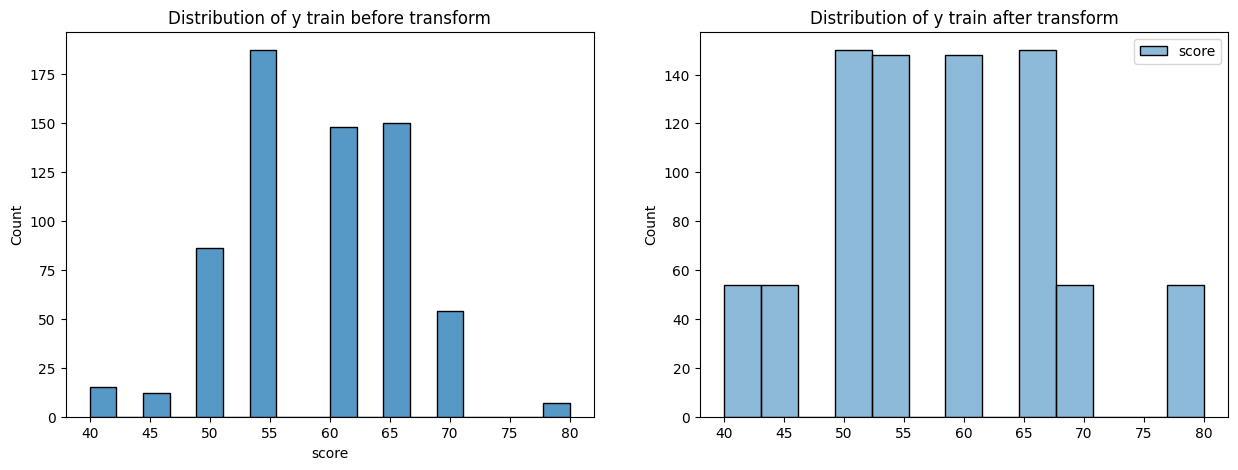

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(trainset, x='score')
plt.title('Distribution of y train before transform')
plt.subplot(1,2,2)
sns.histplot(y_tr_resample1)
plt.title('Distribution of y train after transform')
plt.show()

In [ ]:
# importing the collections module
import collections
# intializing the arr

# getting the elements frequencies using Counter class
elements_count = collections.Counter(df['score'])
# printing the element and the frequency
for key, value in elements_count.items():
   print(f"{key}: {value}")

50.0: 110
55.0: 229
60.0: 195
40.0: 18
70.0: 70
65.0: 179
80.0: 7
45.0: 16


Text(0.5, 1.0, 'Test error of SMOTE+NearMiss with SVM')

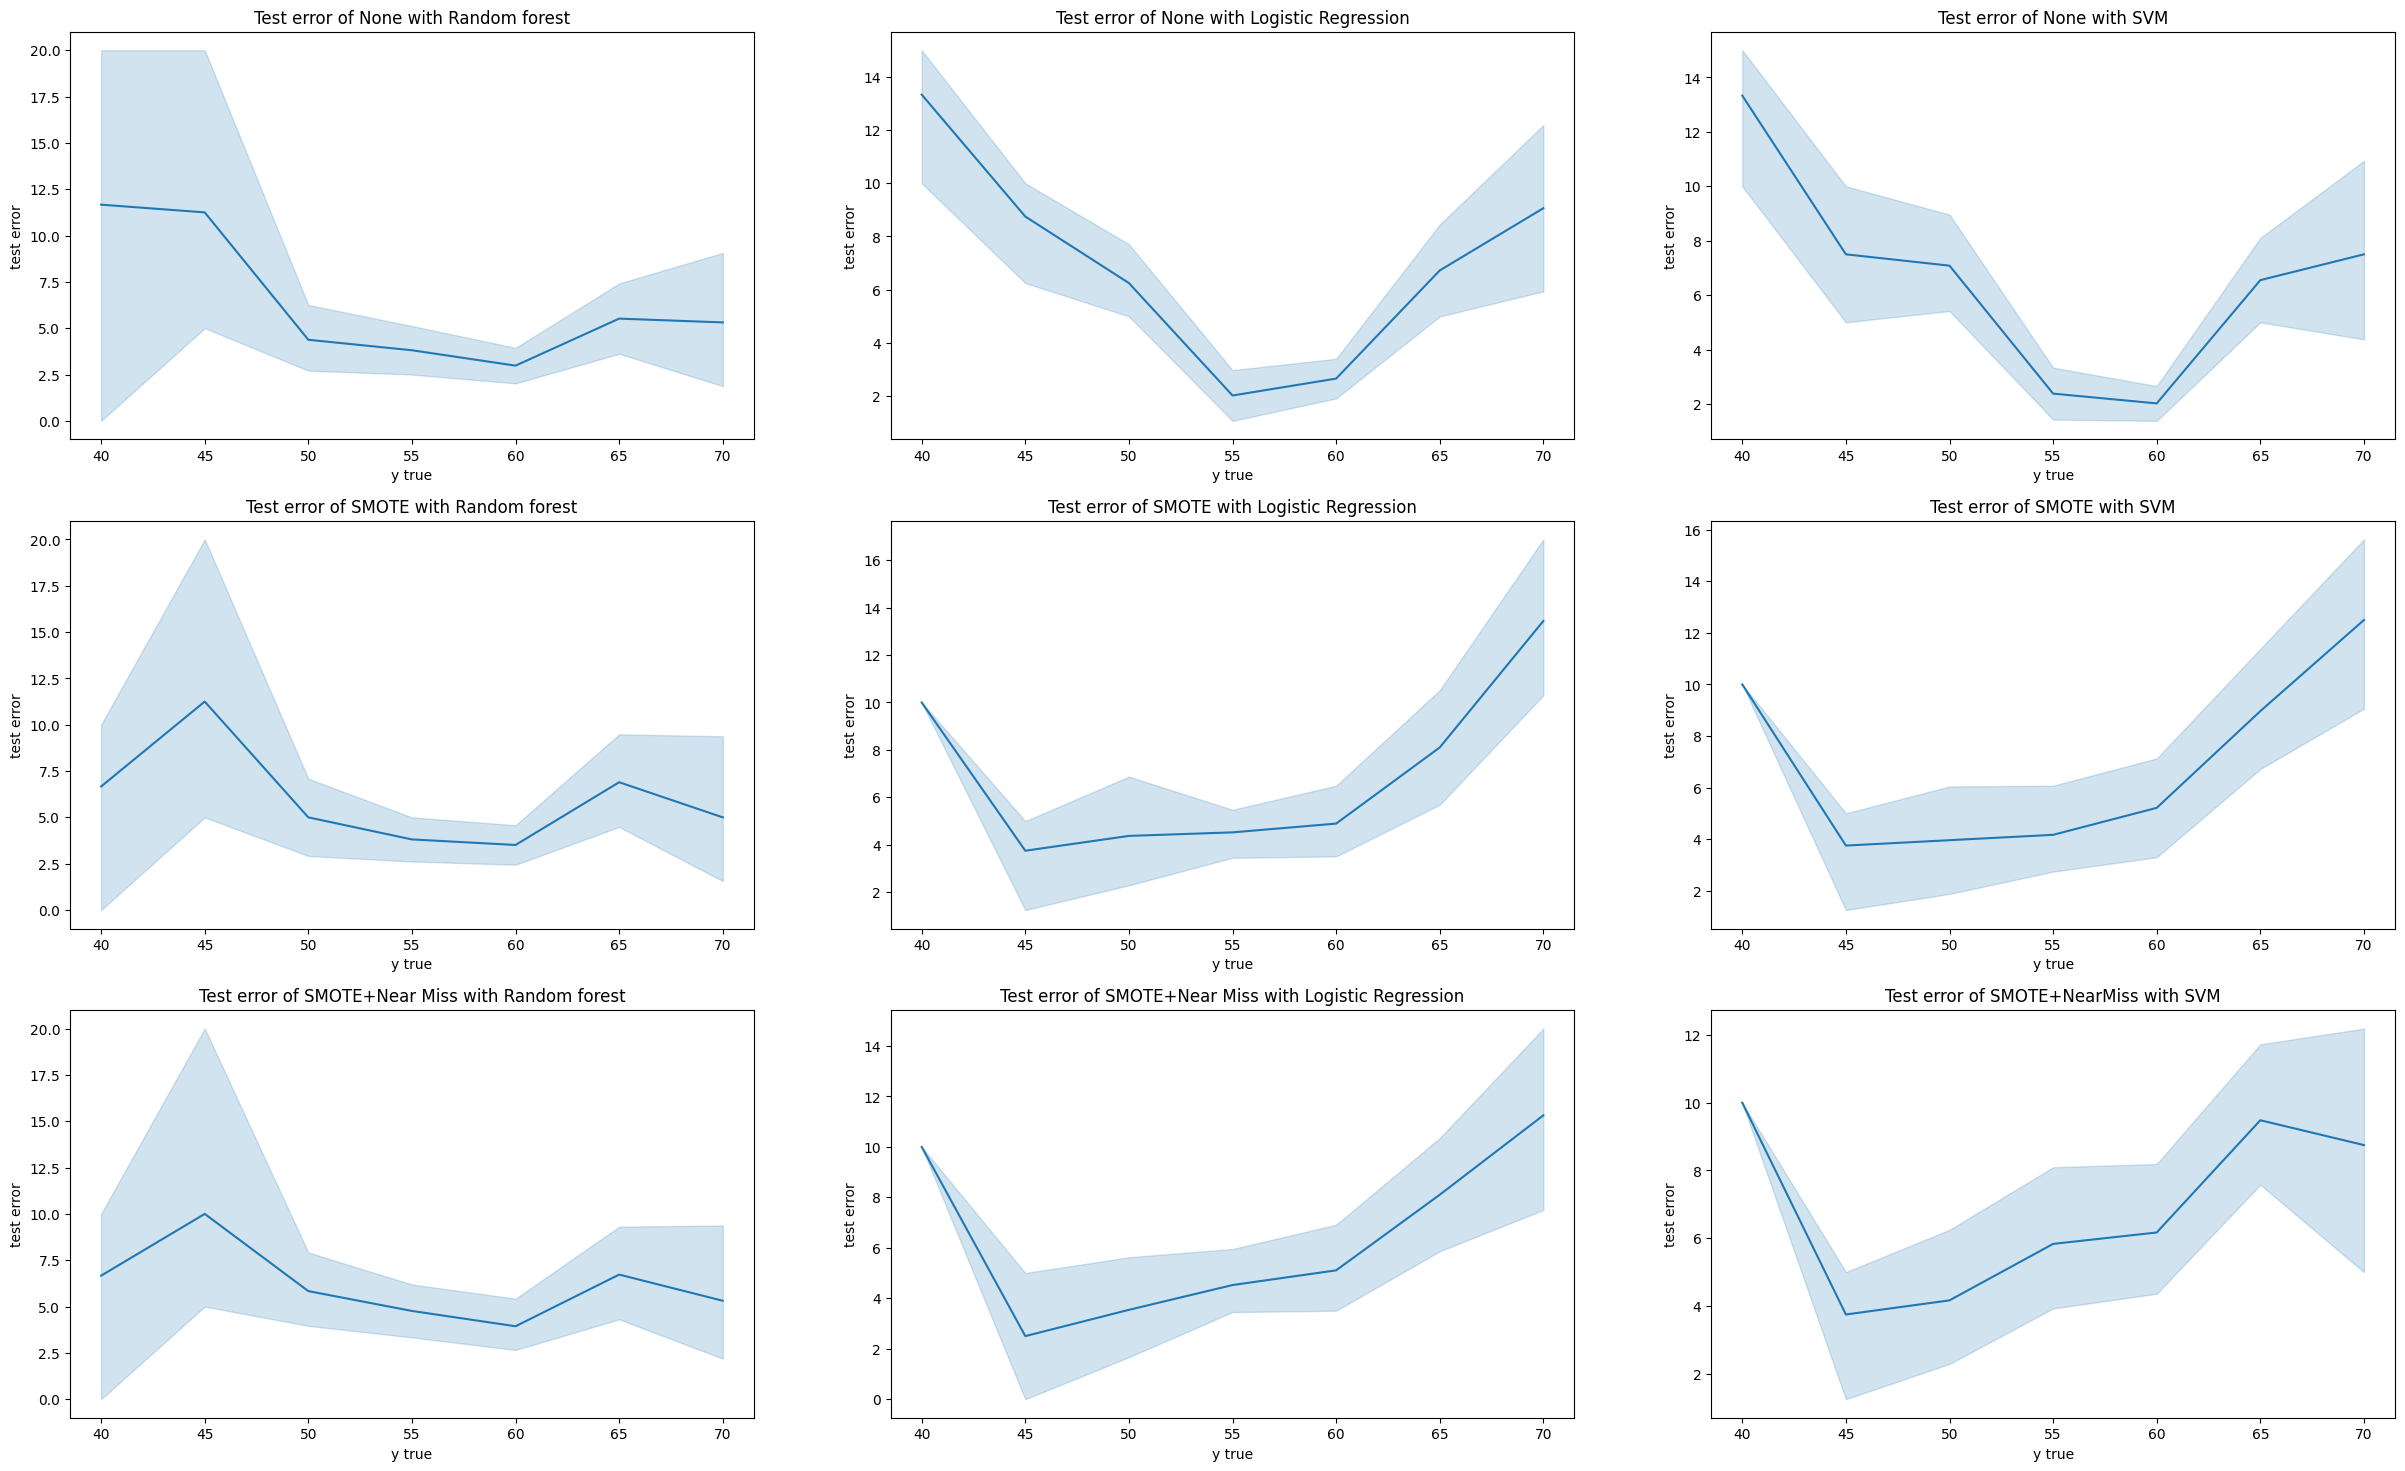

In [ ]:
plt.figure(figsize=(30,18))
plt.subplot(3,3,1)
df = pd.DataFrame({'y true': np.squeeze(y_test.to_numpy()), 'y pred': np.squeeze(y_pred_none_rf)})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x=df['y true'], y=df['test error'])
plt.title('Test error of None with Random forest')

plt.subplot(3,3,2)
df = pd.DataFrame({'y true': np.squeeze(y_test.to_numpy()), 'y pred': np.squeeze(y_pred_none_lgr)})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error of None with Logistic Regression')


plt.subplot(3,3,3)
df = pd.DataFrame({'y true': np.squeeze(y_test.to_numpy()), 'y pred': np.squeeze(y_pred_none_svm)})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error of None with SVM')

plt.subplot(3,3,4)
df = pd.DataFrame({'y true': np.squeeze(y_test.to_numpy()), 'y pred': np.squeeze(y_pred_SMOTE_rf)})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error of SMOTE with Random forest')


plt.subplot(3,3,5)
df = pd.DataFrame({'y true': np.squeeze(y_test.to_numpy()), 'y pred': np.squeeze(y_pred_SMOTE_lgr)})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error of SMOTE with Logistic Regression')

plt.subplot(3,3,6)
df = pd.DataFrame({'y true': np.squeeze(y_test.to_numpy()), 'y pred': np.squeeze(y_pred_SMOTE_svm)})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error of SMOTE with SVM')

plt.subplot(3,3,7)
df = pd.DataFrame({'y true': np.squeeze(y_test.to_numpy()), 'y pred': np.squeeze(y_pred_2_rf)})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error of SMOTE+Near Miss with Random forest')


plt.subplot(3,3,8)
df = pd.DataFrame({'y true': np.squeeze(y_test.to_numpy()), 'y pred': np.squeeze(y_pred_2_lgr)})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error of SMOTE+Near Miss with Logistic Regression')

plt.subplot(3,3,9)
df = pd.DataFrame({'y true': np.squeeze(y_test.to_numpy()), 'y pred': np.squeeze(y_pred_2_svm)})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error of SMOTE+NearMiss with SVM')

